In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("../output/02__preprocessed/train.csv", nrows=10).astype(float)

In [4]:
df_train_raw = pd.read_csv("../data/train.csv", nrows=10)

df_train_raw

,id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
0,train_00000,Homo Sapiens - A Species Gone Ape,"Homo Sapiens A Species Gone Ape, is a narrativ...",11250.0,homo-sapiens-a-species-gone-ape,False,US,USD,1393531464,1393531464,1388503014,1390939464,0
1,train_00001,Manoa Journal of Fried and Half-Fried Ideas ab...,The Fried Journal is about exploring the futur...,2100.0,manoa-journal-of-fried-and-half-fried-ideas-about,False,US,USD,1323558480,1323558481,1319762221,1320128440,0
2,train_00002,Become a Special Friend to RAW GERONIMO,RAW GERONIMO are looking to shoot a music vide...,2000.0,become-a-special-friend-to-raw-geronimo,False,US,USD,1325732983,1325732983,1322956721,1323140983,0
3,train_00003,Field Trip to the Sunrise: A Chicago Kids Adv...,...About a 2nd grader who happens to have a te...,4000.0,field-trip-to-the-sunrise-a-chicago-kids-adven...,False,US,USD,1369972740,1369972740,1368190634,1368493243,0
4,train_00004,Ciara's Bakery and Cafe,My dream is to open up a full service bakery a...,40000.0,ciaras-bakery-and-cafe,False,US,USD,1429209087,1429209087,1423516929,1426617087,0
5,train_00005,Hollywood Failure - A Novel,Hollywood Failure is the first novel by writer...,2600.0,hollywood-failure-a-novel,False,US,USD,1401548160,1401548163,1396968995,1398306946,1
6,train_00006,"You and The Black Dove's new album """"""""""""""""""""""...","My band, The Black Doves, is looking for your ...",16000.0,you-and-the-black-doves-new-album-albino-buffalo,False,US,USD,1264466220,1264466708,1256683687,1256692208,0
7,train_00007,LOVE THE WORLD EP,LOVE THE WORLD\nLove the world EP is music for...,4000.0,love-the-world-ep,False,US,USD,1296096238,1296096240,1293489538,1293504238,0
8,train_00008,3021: Zolan's Song,3021: Zolan's Song is a short film/music video...,250.0,3021-zolans-song,False,US,USD,1409952893,1409952893,1408262593,1408656893,1
9,train_00009,Patchwork Life Album from The Smiths Project V...,"Funding for bonus track Ideas As Opiates, the ...",300.0,patchwork-life-album-from-the-smiths-project-v...,False,US,USD,1333569600,1333569632,1332534497,1332696653,1


In [1]:
## MLP の実験
import torch
import torch.nn as nn
import torch.nn.functional as F

class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims):
        """
        Args:
            input_dim (int): 入力特徴量の次元
            hidden_dims (list of int): 各隠れ層のユニット数（例：[64, 64, 64]）
        """
        super(FlexibleMLP, self).__init__()

        # 層の次元のリスト（input → hidden1 → hidden2 → ...）
        layer_dims = [input_dim] + hidden_dims

        # 隠れ層のリストを構築
        self.hidden_layers = nn.ModuleList([
            nn.Linear(layer_dims[i], layer_dims[i+1])
            for i in range(len(hidden_dims))
        ])

        # 出力層は固定：hidden_dims[-1] → 2
        self.output_layer = nn.Linear(hidden_dims[-1], 2)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x


In [2]:
# 入力が20次元、隠れ層に64ユニットが3層
model = FlexibleMLP(input_dim=20, hidden_dims=[64, 64, 64])
print(model)


FlexibleMLP(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
  )
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
)


In [7]:
df_train.columns

Index(['final_status', 'f01__goal', 'f04__after_Jul2014', 'f04__Year_2009',
       'f04__Year_2010', 'f04__Year_2011', 'f04__Year_2012', 'f04__Year_2013',
       'f04__Year_2014', 'f04__Year_2015', 'f04__datetime',
       'f02__diff__dead__and__state_changed', 'f02__diff__dead__and__created',
       'f02__diff__state_changed__and__created', 'f03__country__AU',
       'f03__country__CA', 'f03__country__DK', 'f03__country__GB',
       'f03__country__IE', 'f03__country__NL', 'f03__country__NO',
       'f03__country__NZ', 'f03__country__SE', 'f03__country__US',
       'f03__currency__AUD', 'f03__currency__CAD', 'f03__currency__DKK',
       'f03__currency__EUR', 'f03__currency__GBP', 'f03__currency__NOK',
       'f03__currency__NZD', 'f03__currency__SEK', 'f03__currency__USD',
       'f05__disable_communication'],
      dtype='object')

In [10]:
df_train[[ 'f02__diff__dead__and__state_changed', 'f02__diff__dead__and__created',
       'f02__diff__state_changed__and__created']].describe()

,f02__diff__dead__and__state_changed,f02__diff__dead__and__created,f02__diff__state_changed__and__created
count,7.569000e+04,7.569000e+04,7.569000e+04
mean,9.522085e+04,6.210802e+06,6.115581e+06
std,4.984549e+05,7.616089e+06,7.631271e+06
min,-1.089743e+06,8.853300e+04,1.950000e+02
25%,-3.000000e+00,2.929047e+06,2.865946e+06
50%,-1.000000e+00,4.071733e+06,4.007496e+06
75%,0.000000e+00,6.164589e+06,6.124016e+06
max,7.777728e+06,1.628837e+08,1.628838e+08


array([[<Axes: title={'center': 'f02__diff__dead__and__created'}>,
        <Axes: title={'center': 'f02__diff__state_changed__and__created'}>]],
      dtype=object)

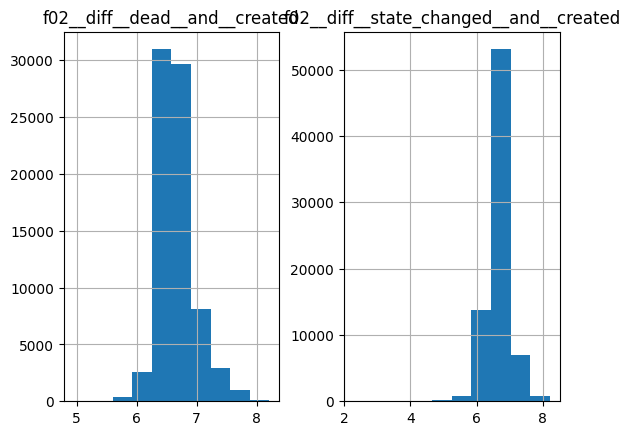

In [12]:
df_train[['f02__diff__dead__and__created',
       'f02__diff__state_changed__and__created']].apply(np.log10).hist()

In [82]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
## インポート
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


cols__LogStandard = [
    'f01__goal',
    'f02__diff__dead__and__created',
    'f02__diff__state_changed__and__created']

cols__Robust = ['f02__diff__dead__and__state_changed']

cols__MinMax = ['f04__datetime']

scale__cols = {
    "St": cols__LogStandard,
    "Rb": cols__Robust,
    "MM": cols__MinMax,
}

train, val = train_test_split(df_train, test_size=20, random_state=42)
dataset = {
    "X_train": train.drop("final_status", axis="columns").astype(np.float32).copy(),
    "X_val": val.drop("final_status", axis="columns").astype(np.float32).copy(),
    "y_train": train["final_status"].astype(np.int64).copy(),
    "y_val": val["final_status"].astype(np.int64).copy(),
}

## 対数変換
dataset["X_train"][cols__LogStandard] = dataset["X_train"][cols__LogStandard].apply(np.log)
dataset["X_val"][cols__LogStandard] = dataset["X_val"][cols__LogStandard].apply(np.log)

## スケーリング
scale__ins = {
    "St": StandardScaler(),
    "Rb": StandardScaler(),
    "MM": StandardScaler(),
}
for scale in scale__cols.keys():
    tmp = scale__ins[scale].fit_transform(
        dataset["X_train"][scale__cols[scale]]
    )
    dataset["X_train"][scale__cols[scale]] = tmp

    dataset["X_val"][scale__cols[scale]] = scale__ins[scale].transform(
        dataset["X_val"][scale__cols[scale]]
    )

# Tensor化＆DataLoader
train_dataset = TensorDataset(torch.tensor(dataset["X_train"].values), torch.tensor(dataset["y_train"].values))
test_dataset = TensorDataset(torch.tensor(dataset["X_val"].values), torch.tensor(dataset["y_val"].values))

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

In [83]:
import pandas as pd
from torch.optim import lr_scheduler

# モデル、損失関数、最適化手法の定義
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FlexibleMLP(
    input_dim=len(dataset["X_train"].columns),
    hidden_dims=[128, 128, 128, 128]
).to(device)

# クラス重みの計算
import numpy as np
y_train_np = dataset["y_train"].to_numpy()
class_counts = np.bincount(y_train_np)
n_samples = len(y_train_np)
n_classes = len(class_counts)
class_weights = n_samples / (n_classes * class_counts)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# 損失関数と最適化
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=5, eta_min=0)
# 1. LambdaLR
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.95 ** epoch)

# エポック数
epochs = 20

# ログを格納するリスト
log_list = []

# 訓練ループ
for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    # テスト損失計算
    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            val_loss = criterion(outputs, yb)
            total_val_loss += val_loss.item()

    # 学習率更新
    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]

    # ログを記録
    log_list.append({
        "epoch": epoch + 1,
        "train_loss": total_train_loss,
        "val_loss": total_val_loss,
        "lr": current_lr
    })

    if epoch%10==0:
        print(f"epoch {epoch} is done.")

# ログをDataFrameに変換
log_df = pd.DataFrame(log_list)

# ログの表示（必要ならCSV保存も可能）
display(log_df)
# log_df.to_csv("training_log.csv", index=False)


epoch 0 is done.
epoch 10 is done.


,epoch,train_loss,val_loss,lr
0,1,377.660724,0.677884,0.009500
1,2,374.715410,0.669024,0.009025
2,3,373.198744,0.710473,0.008574
3,4,372.142526,0.682131,0.008145
4,5,371.163339,0.655084,0.007738
5,6,370.694297,0.660819,0.007351
6,7,370.253193,0.642534,0.006983
7,8,370.165440,0.652437,0.006634
8,9,369.638747,0.649874,0.006302
9,10,369.445127,0.764492,0.005987


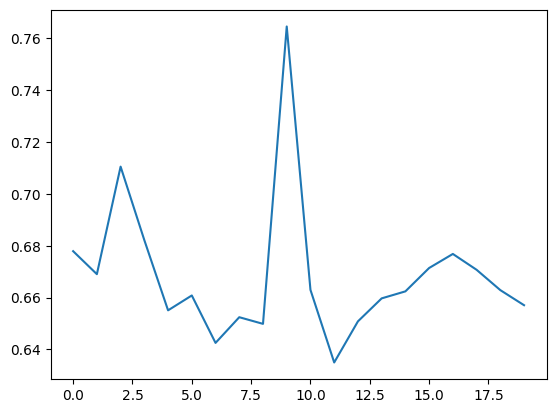

In [84]:
import matplotlib.pyplot as plt

plt.plot(log_df["val_loss"])

In [85]:
from sklearn.metrics import f1_score

model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        outputs = model(xb)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_true.extend(yb.numpy())

rep = f1_score(all_true, all_preds)
print(rep)


0.26666666666666666


In [136]:
tmp = pd.read_csv(
    "../data/train.csv", nrows=10
)

In [137]:
tmp

,id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
0,train_00000,Homo Sapiens - A Species Gone Ape,"Homo Sapiens A Species Gone Ape, is a narrativ...",11250.0,homo-sapiens-a-species-gone-ape,False,US,USD,1393531464,1393531464,1388503014,1390939464,0
1,train_00001,Manoa Journal of Fried and Half-Fried Ideas ab...,The Fried Journal is about exploring the futur...,2100.0,manoa-journal-of-fried-and-half-fried-ideas-about,False,US,USD,1323558480,1323558481,1319762221,1320128440,0
2,train_00002,Become a Special Friend to RAW GERONIMO,RAW GERONIMO are looking to shoot a music vide...,2000.0,become-a-special-friend-to-raw-geronimo,False,US,USD,1325732983,1325732983,1322956721,1323140983,0
3,train_00003,Field Trip to the Sunrise: A Chicago Kids Adv...,...About a 2nd grader who happens to have a te...,4000.0,field-trip-to-the-sunrise-a-chicago-kids-adven...,False,US,USD,1369972740,1369972740,1368190634,1368493243,0
4,train_00004,Ciara's Bakery and Cafe,My dream is to open up a full service bakery a...,40000.0,ciaras-bakery-and-cafe,False,US,USD,1429209087,1429209087,1423516929,1426617087,0
5,train_00005,Hollywood Failure - A Novel,Hollywood Failure is the first novel by writer...,2600.0,hollywood-failure-a-novel,False,US,USD,1401548160,1401548163,1396968995,1398306946,1
6,train_00006,"You and The Black Dove's new album """"""""""""""""""""""...","My band, The Black Doves, is looking for your ...",16000.0,you-and-the-black-doves-new-album-albino-buffalo,False,US,USD,1264466220,1264466708,1256683687,1256692208,0
7,train_00007,LOVE THE WORLD EP,LOVE THE WORLD\nLove the world EP is music for...,4000.0,love-the-world-ep,False,US,USD,1296096238,1296096240,1293489538,1293504238,0
8,train_00008,3021: Zolan's Song,3021: Zolan's Song is a short film/music video...,250.0,3021-zolans-song,False,US,USD,1409952893,1409952893,1408262593,1408656893,1
9,train_00009,Patchwork Life Album from The Smiths Project V...,"Funding for bonus track Ideas As Opiates, the ...",300.0,patchwork-life-album-from-the-smiths-project-v...,False,US,USD,1333569600,1333569632,1332534497,1332696653,1


In [97]:
# 文字数
tmp = tmp.astype(str)
tmp_length = tmp["desc"].apply(len)

<Axes: >

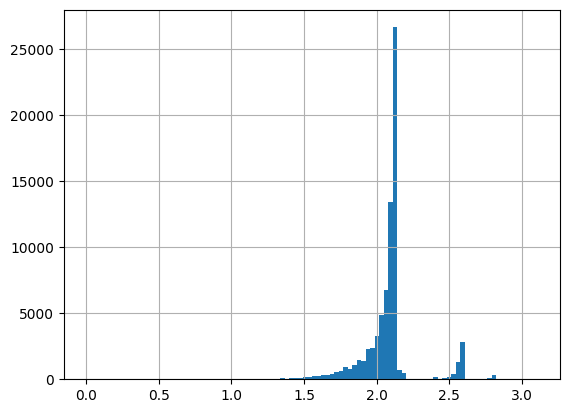

In [103]:
tmp_length.apply(np.log10).hist(bins=100)

In [121]:
# 単語数
tmp = tmp.astype(str)
tmp_n_words = tmp["desc"].apply(
    lambda x: len(x.split(" "))
)

In [132]:
tmp_cp = tmp.copy()
tmp_cp["n_words"] = tmp_n_words
tmp_cp["length"] = tmp_length


In [133]:
tmp_sorted = tmp_cp.sort_values("length")

In [135]:
print(tmp_sorted.iloc[-1]["desc"].replace('"', ''))

A 7 vinyl EP featuring three songs from the full length Everson Poe album Maiden Of Fire: In Fire, Plague & Monument
